In [133]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [134]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [136]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [137]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re

#file_json_contents = file_get_contents("./files_parseds/ALEXIS PEDRÃO_260001087378.json")
file_json_contents = file_get_contents("./files_parseds/EDVALDO_260000983413.json")
json_data = json.loads(file_json_contents)
content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]

In [138]:
stop_words = ["de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
tfIdfVectorizer=TfidfVectorizer(
    max_df=0.8,
    min_df=0.2,
    stop_words=stop_words,
    use_idf=True,
    ngram_range=(1,2),
    max_features=100
)
tfIdf = tfIdfVectorizer.fit_transform(content_pages)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df_word = df.head(50)

sentences_dictionary = {}
text_database = []

for sentence, row in df_word.iterrows():
    if sentence not in stop_words:
        text_instance = {}
        text_instance['sentence'] = sentence
        text_instance['tf-idf'] = row["TF-IDF"]
        sentences_dictionary[sentence] = row["TF-IDF"]
        text_database.append(text_instance)

#print(sentences_dictionary)
print(text_database)

[{'sentence': 'acesso', 'tf-idf': 0.0}, {'sentence': 'ampliar', 'tf-idf': 0.0}, {'sentence': 'inovação', 'tf-idf': 0.0}, {'sentence': 'inteligente', 'tf-idf': 0.0}, {'sentence': 'meio', 'tf-idf': 0.0}, {'sentence': 'municipal', 'tf-idf': 0.0}, {'sentence': 'parceria', 'tf-idf': 0.0}, {'sentence': 'pessoas', 'tf-idf': 0.0}, {'sentence': 'plano', 'tf-idf': 0.0}, {'sentence': 'população', 'tf-idf': 0.0}, {'sentence': 'programa', 'tf-idf': 0.0}, {'sentence': 'projeto', 'tf-idf': 0.0}, {'sentence': 'projetos', 'tf-idf': 0.0}, {'sentence': 'pública', 'tf-idf': 0.0}, {'sentence': 'públicos', 'tf-idf': 0.0}, {'sentence': 'qualidade', 'tf-idf': 0.0}, {'sentence': 'rede', 'tf-idf': 0.0}, {'sentence': 'saúde', 'tf-idf': 0.0}, {'sentence': 'segurança', 'tf-idf': 0.0}, {'sentence': 'serviços', 'tf-idf': 0.0}, {'sentence': 'social', 'tf-idf': 0.0}, {'sentence': 'transporte', 'tf-idf': 0.0}, {'sentence': 'vida', 'tf-idf': 0.0}, {'sentence': 'infraestrutura', 'tf-idf': 0.0}, {'sentence': 'incentivo', 

/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [139]:
tfIdf.shape

(48, 48)

In [140]:
dataframe_texts =  pd.DataFrame(text_database)
dataframe_texts

,sentence,tf-idf
0,acesso,0.0
1,ampliar,0.0
2,inovação,0.0
3,inteligente,0.0
4,meio,0.0
5,municipal,0.0
6,parceria,0.0
7,pessoas,0.0
8,plano,0.0
9,população,0.0


In [141]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica

for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(tfIdf)
  score = metrics.silhouette_score(tfIdf, km.labels_, metric='euclidean')
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

Para k=2 o valor Silhoutte foi de 0.0447
Para k=3 o valor Silhoutte foi de 0.0466
Para k=4 o valor Silhoutte foi de 0.0357
Para k=5 o valor Silhoutte foi de 0.0573
Para k=6 o valor Silhoutte foi de 0.0218
Para k=7 o valor Silhoutte foi de 0.0490
Para k=8 o valor Silhoutte foi de 0.0500
Para k=9 o valor Silhoutte foi de 0.0561


In [142]:
km = KMeans(n_clusters=5,random_state=42)
clusters_km = km.fit_predict(tfIdf)
clusters_km

array([0, 1, 1, 1, 1, 3, 3, 1, 4, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2,
       1, 0, 3, 0, 1, 0, 1, 1, 2, 0, 4, 4, 3, 0, 0, 0, 4, 1, 2, 2, 1, 1,
       0, 2, 0, 0], dtype=int32)

In [143]:
dataframe_texts['clusters_km'] = pd.Series(clusters_km)
dataframe_texts

,sentence,tf-idf,clusters_km
0,acesso,0.0,0
1,ampliar,0.0,1
2,inovação,0.0,1
3,inteligente,0.0,1
4,meio,0.0,1
5,municipal,0.0,3
6,parceria,0.0,3
7,pessoas,0.0,1
8,plano,0.0,4
9,população,0.0,2


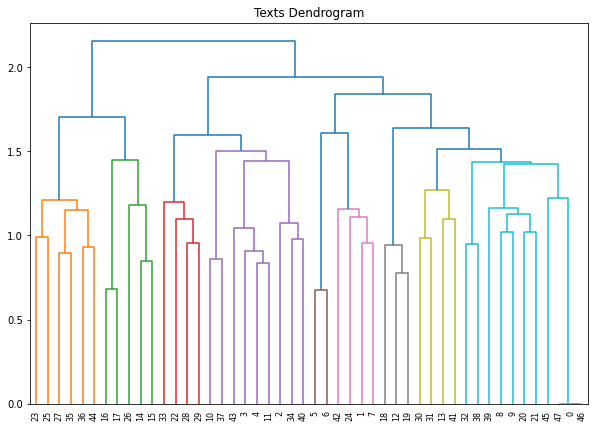

In [144]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Criando e plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Texts Dendrogram")
cluster_alg = shc.linkage(tfIdf.toarray(), method='ward',)
dend = shc.dendrogram(cluster_alg)

In [145]:
# Imports Necessários
from sklearn.cluster import AgglomerativeClustering

# Criação do Cluster
agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(tfIdf.toarray())
clusters_agg

array([1, 2, 0, 0, 0, 6, 6, 2, 1, 1, 0, 0, 5, 1, 3, 3, 3, 3, 5, 5, 1, 1,
       0, 4, 2, 4, 3, 4, 0, 0, 1, 1, 1, 0, 0, 4, 4, 0, 1, 1, 0, 1, 2, 0,
       4, 1, 1, 1])

In [146]:
dataframe_texts['cluster_agg'] = pd.Series(clusters_agg)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,acesso,0.0,0,1
1,ampliar,0.0,1,2
2,inovação,0.0,1,0
3,inteligente,0.0,1,0
4,meio,0.0,1,0
5,municipal,0.0,3,6
6,parceria,0.0,3,6
7,pessoas,0.0,1,2
8,plano,0.0,4,1
9,população,0.0,2,1


In [147]:
## Limpar valores NaN para 0

dataframe_texts = dataframe_texts.fillna(0)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,acesso,0.0,0,1
1,ampliar,0.0,1,2
2,inovação,0.0,1,0
3,inteligente,0.0,1,0
4,meio,0.0,1,0
5,municipal,0.0,3,6
6,parceria,0.0,3,6
7,pessoas,0.0,1,2
8,plano,0.0,4,1
9,população,0.0,2,1


In [148]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[41, 21, 35, 34,  8, 24,  9, 30,  5, 22, 33,  1,  6, 40, 38,  7,
         3, 16, 18,  4, 28, 42, 15, 32, 36, 10, 11, 44, 19, 20, 47,  2,
        37,  0, 31, 25, 23, 43, 14, 46, 39, 26, 13, 12, 17, 27, 29, 45],
       [31, 12, 20,  0, 44, 14,  2, 46, 33, 37,  1,  3, 43, 29, 39,  7,
        28, 41, 42,  8, 26, 19, 47,  5, 13,  6, 17, 27, 21, 25, 40, 45,
        38, 35, 15, 34, 10, 11,  4, 36, 24, 32, 22, 16,  9, 18, 30, 23],
       [ 2, 23,  4, 26, 36, 18, 43, 12, 16, 29, 38, 11, 21,  9, 33, 17,
        30, 25, 40, 34, 28, 20,  6, 14, 15,  1, 47,  8, 13, 32, 46, 42,
        27, 45,  7, 24, 37,  0, 39, 31, 22, 41,  5, 19,  3, 44, 35, 10],
       [10, 44, 25,  7,  2, 39,  9, 41, 22, 46, 29, 18, 26, 38, 31, 37,
        27,  8, 21, 43, 28,  6,  0, 32, 11, 14, 15,  4, 30, 36, 34,  1,
        42, 20, 12,  3, 40, 35,  5, 47, 13, 16, 17, 19, 24, 33, 45, 23],
       [45, 32,  2, 13, 42,  5, 38, 47, 27,  8, 16, 43, 33, 22, 24, 34,
        37, 30, 17, 14, 36, 20, 41,  9, 23, 25, 44, 46, 10, 

In [149]:
# Criação de uma veriável com a lista de palavras que representa as colunas da matriz.
terms = tfIdfVectorizer.get_feature_names_out()

In [150]:
terms

array(['acesso', 'ampliar', 'aracaju', 'assistência', 'através',
       'avançar', 'ações', 'centro', 'compromissos', 'comunidades',
       'construção', 'criar', 'desenvolvimento', 'diretrizes', 'educação',
       'empreendedorismo', 'espaços', 'foco', 'forma', 'fortalecer',
       'gestão', 'implantar', 'implementar', 'incentivar', 'incentivo',
       'infraestrutura', 'inovação', 'inteligente', 'meio', 'municipal',
       'parceria', 'pessoas', 'plano', 'população', 'programa', 'projeto',
       'projetos', 'pública', 'públicos', 'qualidade', 'rede', 'saúde',
       'segurança', 'serviços', 'social', 'transporte', 'vida', 'áreas'],
      dtype=object)

In [151]:
centroids = []
# 5 foi o número de clusters que usamos para treinar o modelo do K-Means
for i in range(5): 
  list_id = order_centroids[i]
  list_terms = [terms[id] for id in list_id[:10]]
  centroids.append({'cluster': i, 'words': ', '.join(list_terms)})

df_centroids = pd.DataFrame(centroids)
df_centroids

,cluster,words
0,0,"saúde, implantar, projeto, programa, compromis..."
1,1,"pessoas, desenvolvimento, gestão, acesso, soci..."
2,2,"aracaju, incentivar, através, inovação, projet..."
3,3,"construção, social, infraestrutura, centro, ar..."
4,4,"transporte, plano, aracaju, diretrizes, segura..."


In [152]:
for n in range(5):
  print("Cluster %i: %s" % (n, list(df_centroids[df_centroids['cluster'] == n]['words'][:5])))
  data_selected = dataframe_texts[dataframe_texts['clusters_km'] == n]
  for index, row in data_selected.head(10).iterrows():
    print("sentence: %s" % row['sentence'])
  print()

Cluster 0: ['saúde, implantar, projeto, programa, compromissos, incentivo, comunidades, parceria, avançar, implementar']
sentence: acesso
sentence: rede
sentence: saúde
sentence: infraestrutura
sentence: incentivar
sentence: aracaju
sentence: ações
sentence: construção
sentence: desenvolvimento
sentence: implementar

Cluster 1: ['pessoas, desenvolvimento, gestão, acesso, social, educação, aracaju, vida, população, pública']
sentence: ampliar
sentence: inovação
sentence: inteligente
sentence: meio
sentence: pessoas
sentence: programa
sentence: projeto
sentence: projetos
sentence: públicos
sentence: qualidade

Cluster 2: ['aracaju, incentivar, através, inovação, projetos, forma, serviços, desenvolvimento, espaços, municipal']
sentence: população
sentence: pública
sentence: segurança
sentence: serviços
sentence: social
sentence: transporte
sentence: avançar
sentence: empreendedorismo
sentence: espaços
sentence: gestão

Cluster 3: ['construção, social, infraestrutura, centro, aracaju, qual

In [153]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_dictionary)

plt.imshow(words_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/home/nathanfeitoza/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:410: RuntimeWarning: invalid value encountered in double_scalars
  frequencies = [(word, freq / max_frequency)


ValueError: cannot convert float NaN to integer